In [1]:
import random
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [107]:
key = ''
for i in range(random.randint(4,4)):
    temp = str(random.randint(0,1))
    key += temp
print(key)

1110


In [108]:
c = QuantumCircuit(4+1, 4)

c.h(range(len(key)))
c.x(len(key))
c.h(len(key))

for k, s in enumerate(reversed(key)):
    if s == '1':
        c.cx(k, len(key))

c.h(range(len(key)))
c.measure(range(len(key)), range(len(key)))
c.draw()

┌───┐┌───┐     ┌─┐                        
q_0: ┤ H ├┤ H ├─────┤M├────────────────────────
     ├───┤└───┘     └╥┘┌───┐     ┌─┐           
q_1: ┤ H ├───────■───╫─┤ H ├─────┤M├───────────
     ├───┤       │   ║ └───┘┌───┐└╥┘     ┌─┐   
q_2: ┤ H ├───────┼───╫───■──┤ H ├─╫──────┤M├───
     ├───┤       │   ║   │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼───╫───┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐ ║ ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├─╫─┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘ ║ └───┘└───┘ ║       ║  ║ 
c: 4/════════════════╩════════════╩═══════╩══╩═
                     0            1       2  3

In [109]:
simulator = Aer.get_backend("qasm_simulator")

In [110]:
result = execute(c, backend = simulator).result()

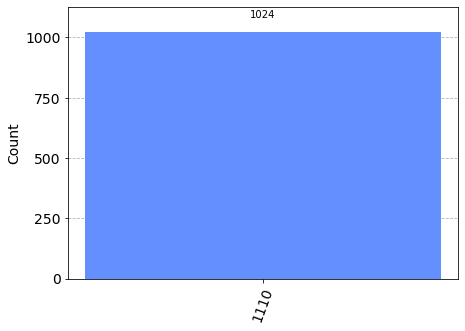

In [111]:
plot_histogram(result.get_counts(c))

In [48]:
from qiskit import IBMQ

In [49]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-15 16:05:02,689: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [50]:
provider = IBMQ.get_provider('ibm-q')

In [51]:
qc = provider.get_backend('ibmq_belem')

In [52]:
job = execute(c, backend =qc, shots = 1)

In [53]:
from qiskit.tools.monitor import job_monitor

In [54]:
job_monitor(job)

Job Status: job has successfully run


In [55]:
result = job.result()

In [56]:
counts = result.get_counts()
print(counts)

{'1110': 1}
